In [1]:
install.packages("dplyr")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
install.packages("ggplot2")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [3]:
install.packages("usmap")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
install.packages("scales")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
library(usmap)

In [6]:
library(ggplot2)

In [7]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [8]:
setwd ("/Users/ruyazhang/downloads")

In [9]:
dat1 <- read.csv("MedicareAllTelehealth.csv")

In [10]:
medicare1 <- dat1[,c("State", "Gender", "Credentials", "City", "ProviderType")]

In [11]:
summary(medicare1, maxsum = 100)

 State      Gender                  Credentials                   City       
 AE:   44    :    17   MD                 :339781   NEW YORK        : 11651  
 AK: 1959   F:391309   M.D.               :339013   CHICAGO         :  9328  
 AL:15312   M:657249   D.O.               : 40297   HOUSTON         :  9256  
 AP:   11                                 : 34868   PHILADELPHIA    :  7955  
 AR: 9617              DO                 : 29543   BOSTON          :  7541  
 AZ:20759              PA-C               : 29222   ROCHESTER       :  6569  
 CA:78966              NP                 : 17554   BALTIMORE       :  6389  
 CO:16237              DPM                : 15396   COLUMBUS        :  6158  
 CT:15793              PA                 : 12488   SPRINGFIELD     :  6008  
 DC: 3100              M.D                : 11953   BROOKLYN        :  5928  
 DE: 4049              FNP                : 11150   LOS ANGELES     :  5803  
 FL:73622              O.D.               : 10975   DALLAS      

In [12]:
aggNumServices <- aggregate(NumberServices ~ State, dat1, sum)

In [13]:
aggNumServices[order(aggNumServices$NumberServices),]

,State,NumberServices
4,AP,589.0
1,AE,4460.0
58,XX,4492.0
29,MP,4804.0
59,ZZ,5811.0
14,GU,19324.0
52,VI,25649.0
2,AK,194642.0
57,WY,216437.5
44,PR,223525.0


In [14]:
#Summary statistic (mean, standard deviation, median, Interquartile Range(25th and 75th percentile), min,max)
summary(aggNumServices)

     State    NumberServices    
 AE     : 1   Min.   :     589  
 AK     : 1   1st Qu.:  423102  
 AL     : 1   Median : 1529122  
 AP     : 1   Mean   : 2782843  
 AR     : 1   3rd Qu.: 3770341  
 AZ     : 1   Max.   :14733962  
 (Other):53                     

In [15]:
#read dataset from CMS for medicare benificiaries
setwd ("/Users/ruyazhang/downloads")

In [16]:
dat2 <- read.csv("StateCountyFFS2017.csv")

In [17]:
# State Total FFS population
stateBeneficiaries <- select(filter(dat2, County == "STATE TOTAL"), c(State, Beneficiaries) )

In [18]:
#print(stateBeneficiaries)

In [19]:
#df <- merge(x=stateBeneficiaries, y=aggNumServices, by = "State", all=TRUE, sort=TRUE)

In [20]:
#merge is a function in dplyr package, this merge reduced from 55 states in telehealth data to 53 states from FFS
df <- merge(x=stateBeneficiaries, y=aggNumServices, by = "State")

In [21]:
#Culculation NumberServices/Beneficiaries and converted number to  numeric
df$ServicePerFFS <- df[,3]/as.numeric(as.character(df[,2]))

In [22]:
print(df)

   State Beneficiaries NumberServices ServicePerFFS
1     AK      82927.00       194642.0     2.3471487
2     AL     969116.00      2785515.5     2.8742849
3     AR     593592.00      1849179.0     3.1152357
4     AZ    1155335.00      3341049.5     2.8918448
5     CA    5478663.00     14406425.5     2.6295513
6     CO     789379.00      1821354.0     2.3073251
7     CT     604883.00      2276817.5     3.7640626
8     DC      76084.00       408470.0     5.3686715
9     DE     184883.00       777223.0     4.2038641
10    FL    4148415.00     14733962.0     3.5517088
11    GA    1544616.00      4821690.0     3.1216108
12    HI     231721.00       422287.0     1.8223942
13    IA     577446.00      1503018.0     2.6028720
14    ID     294633.00       552327.0     1.8746271
15    IL    2007176.00      6910017.8     3.4426566
16    IN    1160602.00      3644839.0     3.1404728
17    KS     485625.00      1529122.0     3.1487712
18    KY     857387.00      2723987.1     3.1770800
19    LA    

In [23]:
write.csv(df, "stateAll.csv")

In [24]:
setwd("/Users/ruyazhang/downloads")

In [25]:
df <- read.csv("stateAll.csv")

In [26]:
df <- df[,-1]

In [27]:
names(df) <- c("abbr","FFSpop","Service","ServicePerFFS")

In [28]:
df <- merge(statepop, df, by="abbr")

In [29]:
df$ServicePerFFS <- df$ServicePerFFS *100

In [30]:
print(df)

   abbr fips                 full pop_2015  FFSpop    Service ServicePerFFS
1    AK   02               Alaska   738432   82927   194642.0      234.7149
2    AL   01              Alabama  4858979  969116  2785515.5      287.4285
3    AR   05             Arkansas  2978204  593592  1849179.0      311.5236
4    AZ   04              Arizona  6828065 1155335  3341049.5      289.1845
5    CA   06           California 39144818 5478663 14406425.5      262.9551
6    CO   08             Colorado  5456574  789379  1821354.0      230.7325
7    CT   09          Connecticut  3590886  604883  2276817.5      376.4063
8    DC   11 District of Columbia   672228   76084   408470.0      536.8671
9    DE   10             Delaware   945934  184883   777223.0      420.3864
10   FL   12              Florida 20271272 4148415 14733962.0      355.1709
11   GA   13              Georgia 10214860 1544616  4821690.0      312.1611
12   HI   15               Hawaii  1431603  231721   422287.0      182.2394
13   IA   19

Warning message:
“Use of `map_df$x` is discouraged. Use `x` instead.”Warning message:
“Use of `map_df$y` is discouraged. Use `y` instead.”Warning message:
“Use of `map_df$group` is discouraged. Use `group` instead.”

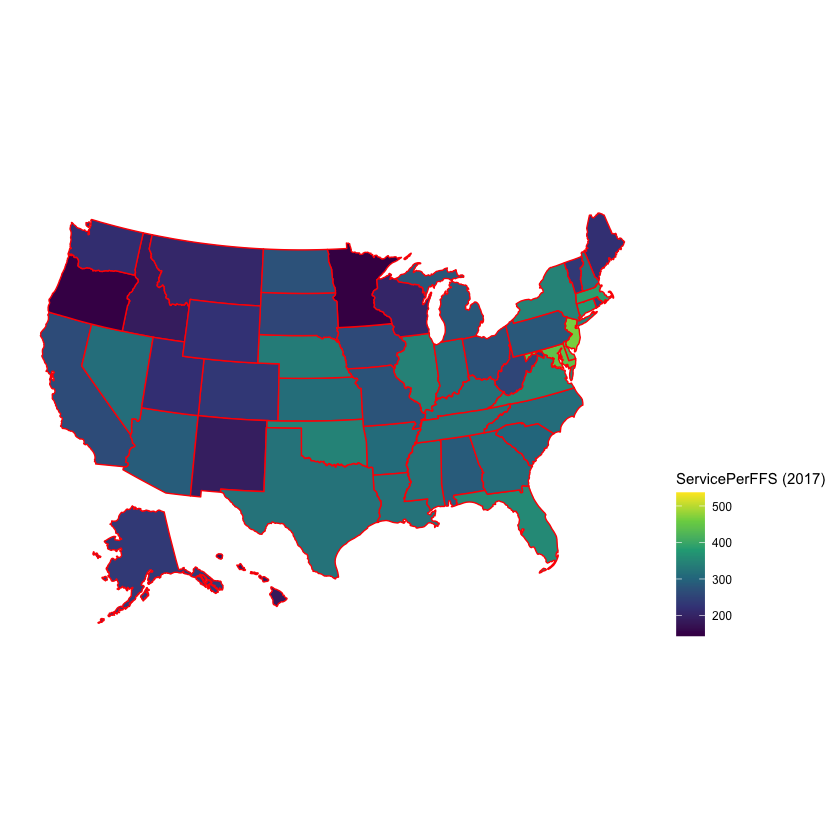

In [31]:
plot_usmap(data = df, values = "ServicePerFFS", color = "red") + 
  scale_fill_continuous(name = "ServicePerFFS (2017)", type = "viridis", label = scales::comma) + 
  theme(legend.position = "right")

In [32]:
setwd ("/Users/ruyazhang/downloads")

In [35]:
dat1 <- read.csv("MedicareAllTelehealth.csv")

In [36]:
UniqueNPI <- summarize(group_by(dat1, State), unique_NPI = n_distinct(NPI))

`summarise()` ungrouping output (override with `.groups` argument)


In [40]:
names(UniqueNPI) <- c("abbr","NumberOfProvider")

In [41]:
df <- merge(df, UniqueNPI, by="abbr")

Warning message:
“Use of `map_df$x` is discouraged. Use `x` instead.”Warning message:
“Use of `map_df$y` is discouraged. Use `y` instead.”Warning message:
“Use of `map_df$group` is discouraged. Use `group` instead.”

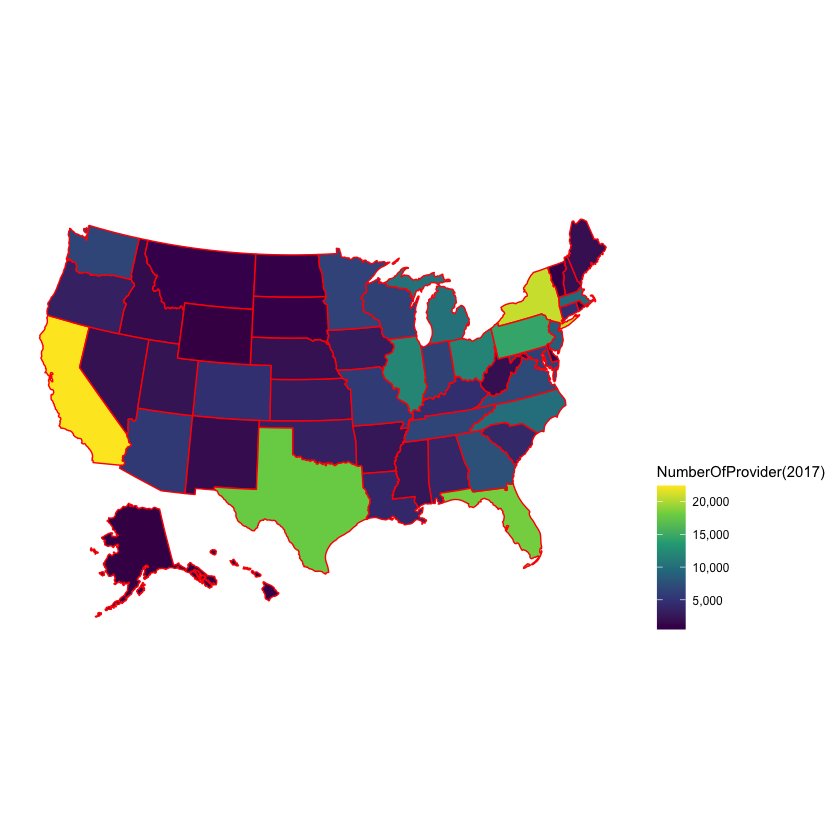

In [42]:
plot_usmap(data = df, values = "NumberOfProvider", color = "red") + 
  scale_fill_continuous(name = "NumberOfProvider(2017)", type = "viridis", label = scales::comma) + 
  theme(legend.position = "right")